In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import scipy.stats as stats
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv("../clean_combined.csv") 


AttributeError: 'function' object has no attribute 'count'

In [22]:
precovid_mortality = df[df.years_relative < 0].em_per_capita.dropna()
precovid_mortality = precovid_mortality.tolist()

In [25]:
em_per_capita_dist = stats.norm.fit(precovid_mortality)

In [28]:
c1 = stats.norm(em_per_capita_dist[0], em_per_capita_dist[1]).ppf((1-0.90)/2)
c2 = stats.norm(em_per_capita_dist[0], em_per_capita_dist[1]).ppf(1-(1-0.90)/2)
print('c1 is', c1, 'c2 is', c2)

c1 is -1.4172257608963227e-05 c2 is 1.4172257608963305e-05


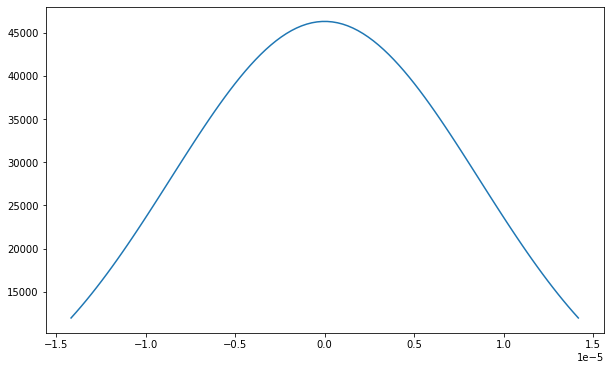

In [32]:
plt.figure(figsize=(10,6))
x = np.linspace(c1,c2,100)
plt.plot(x, stats.norm(em_per_capita_dist[0], em_per_capita_dist[1]).pdf(x))

In [40]:
df['em_z_score'] = (df['em_per_capita'] - em_per_capita_dist[0])/em_per_capita_dist[1]
df

,country,week,year,DTotal,date,mov_avg,years_relative,pred_deaths,excess_mortality,em_per_capita,...,new_cases,total_deaths,new_deaths,total_cases_per_million,hosp_patients,population,mov_avg_cases,new_cases_per_capita,normalized_cases,em_z_score
0,FIN,1,1990,1146.0,1990-01-07,1146.000000,-30,995.164977,150.835023,0.000027,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.155191
1,FIN,2,1990,1139.0,1990-01-14,1142.500000,-30,1009.888018,132.611982,0.000024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.773999
2,FIN,3,1990,1185.0,1990-01-21,1156.666667,-30,1020.113159,136.553507,0.000025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.856448
3,FIN,4,1990,1164.0,1990-01-28,1158.500000,-30,1024.963902,133.536098,0.000024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.793330
4,FIN,5,1990,1103.0,1990-02-04,1147.400000,-30,1022.074409,125.325591,0.000023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.621581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34634,DNK,4,2022,1172.0,2022-01-30,1245.428571,2,1047.255887,198.172684,0.000034,...,315652.0,3621.0,130.0,247394.854,894.0,5813302.0,165585.142857,0.028484,0.884762,3.956481
34635,NLD,5,2022,3450.0,2022-02-06,3384.285714,2,3112.960176,271.325538,0.000016,...,436879.0,21356.0,42.0,258648.325,1035.0,17173094.0,254533.428571,0.014822,0.460388,1.833709
34636,DNK,5,2022,1193.0,2022-02-06,1236.428571,2,1067.978022,168.450549,0.000029,...,213855.0,3755.0,90.0,299755.457,1028.0,5813302.0,187152.285714,0.032194,1.000000,3.363084
34637,EST,5,2022,373.0,2022-02-06,370.142857,2,291.146316,78.996541,0.000060,...,33509.0,2033.0,17.0,254713.294,NaN,1325188.0,19138.428571,0.014442,0.448597,6.918609


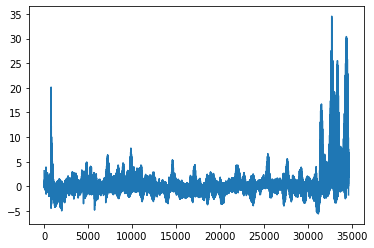

In [41]:
plt.plot(df['em_z_score'])

In [48]:
df.to_csv('z_score.csv', index=False)

In [70]:
country_rank = df[(df.em_z_score > 1.96) & (df.years_relative >= 0)].groupby('country').count()

In [71]:
country_rank.sort_values(by='country')
country_rank.to_csv('country_rank.csv')

In [60]:
country_codes = ['AUS', 'AUT', 'BEL', 'BGR', 'CAN', 'CHE', 'CHL', 'CZE', 'DEU', 'DNK', 'ESP', 'EST',
 'FIN', 'FRA', 'GBR', 'GRC', 'HRV', 'HUN', 'ISL', 'ISR', 'ITA', 'KOR', 'LTU', 'LUX', 'LVA', 'NLD',
 'NZL', 'NOR', 'POL', 'PRT', 'RUS', 'SVN', 'SVK', 'SWE', 'TWN', 'USA']

In [74]:
rankdf = pd.read_csv("country_rank.csv")

In [75]:
rankdf['percent_excess'] = rankdf['em_z_score'] / 104

In [77]:
rankdf.to_csv('country_rank.csv')